# Part A:

![Alt text](1.PNG)

In [ ]:
This correlation shows a very strong positive relationship (r ≈ 0.95) between GMO soybean usage in North Dakota and geothermal power generation in 
Russia. If this correlation were actually true, it would suggest a surprising and world-changing connection where agricultural biotechnology in one 
region directly influences a major energy sector in another country. For example, increasing GMO farming could be interpreted as increasing geothermal 
energy output, which would radically change global energy policy. However, the correlation is purely coincidental—these two variables have no 
scientific or logical connection. The pattern only appears because both variables trend upward over time, making it a textbook example of a spurious 
correlation.

# Part B:

### Spurious Correlation:
A spurious correlation is a strong statistical relationship that appears between two variables even though there is no real causal connection. It usually happens when both variables follow similar trends by chance.

### How Often It Happens:
Such correlations are common in large or time-based datasets because random variables can match patterns accidentally, especially when both rise or fall over years.

### How to Spot Them:
They can be identified by checking if there is any logical cause between the variables, removing time trends, and seeing whether the relationship still holds under different conditions.

# Part C:
link : https://www.kaggle.com/datasets/arslaan5/global-data-gdp-life-expectancy-and-more

life_expectancy_female              0
secondary_school_enrollment_male    0
dtype: int64
Correlation r = 0.8130947882030133


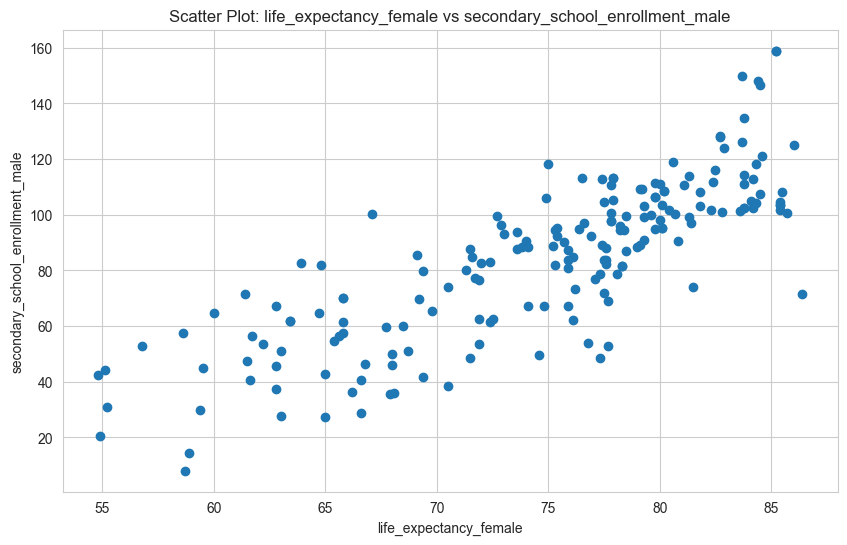

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Load the dataset after you download it from Kaggle
df = pd.read_csv("country_data.csv")

df = df[["life_expectancy_female", "secondary_school_enrollment_male"]]

# Remove rows with missing values
df = df.dropna()

print(df.isna().sum())   # verify no NaN left
 
# Select two variables
x = df["life_expectancy_female"]
y = df["secondary_school_enrollment_male"]

# Compute correlation
r, p = pearsonr(x, y)
print("Correlation r =", r)

# Scatter plot
plt.scatter(x, y)
plt.xlabel("life_expectancy_female")
plt.ylabel("secondary_school_enrollment_male")
plt.title("Scatter Plot: life_expectancy_female vs secondary_school_enrollment_male")
plt.show()

# part D:

In [18]:
import numpy as np
from scipy.stats import pearsonr, norm

# correlation and sample size
r, p = pearsonr(x, y)
n = len(x)

# Fisher z-transform
z = 0.5 * np.log((1 + r) / (1 - r))
se = 1 / np.sqrt(n - 3)

# 95% confidence interval
z_low = z - 1.96 * se
z_high = z + 1.96 * se

# convert back to correlation scale
r_low = (np.exp(2*z_low) - 1) / (np.exp(2*z_low) + 1)
r_high = (np.exp(2*z_high) - 1) / (np.exp(2*z_high) + 1)

print("Observed correlation r:", r)
print("p-value:", p)
print("95% CI: (", r_low, ",", r_high, ")")

Observed correlation r: 0.8130947882030133
p-value: 1.4098766989773696e-45
95% CI: ( 0.7582105986252794 , 0.8565372640864288 )


# Part E:

In [20]:
import numpy as np

boot_corr = []

for i in range(1000):
    sample = df.sample(len(df), replace=True)
    r_boot, _ = pearsonr(sample["life_expectancy_female"], sample["secondary_school_enrollment_male"])
    boot_corr.append(r_boot)

# Percentile CI
lower = np.percentile(boot_corr, 2.5)
upper = np.percentile(boot_corr, 97.5)

print("Bootstrap 95% CI:", (lower, upper))

Bootstrap 95% CI: (np.float64(0.767602187474064), np.float64(0.851038775231117))
